## Final Project Submission

Please fill out:
* Student name: Joby Varghese
* Student pace: part time
* Scheduled project review date/time: 14 May 2023
* Instructor name: Hardik Idnani
* Blog post URL:


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## data: "imdb.title.basics"

In [2]:
df1 = pd.read_csv("zippedData/imdb.title.basics.csv.gz")

In [3]:
df1.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


**Indentifying columns with missing values (in percentage)**

In [4]:
df1.apply(pd.isnull).sum()/df1.shape[0]

tconst             0.000000
primary_title      0.000000
original_title     0.000144
start_year         0.000000
runtime_minutes    0.217176
genres             0.037005
dtype: float64

**Identifying only those rows where 'original_title' is missing or NaN**

In [5]:
df1[pd.isnull(df1["original_title"])]

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
39095,tt2397619,Woody Allen: A Documentary,NaN,2012,195.0,NaN
58624,tt3414266,The Outer Loop,NaN,2013,78.0,NaN
62944,tt3616658,The Hangman,NaN,2017,NaN,NaN
79274,tt4548042,Urban Legend: The Blind Side Strangler,NaN,2016,NaN,NaN
80116,tt4599436,Please Don't Eat the Pansies,NaN,2016,NaN,NaN
82058,tt4715728,Regen,NaN,2016,NaN,NaN
82308,tt4732998,Limbo,NaN,2017,NaN,NaN
85353,tt4940426,OldZilla,NaN,2018,NaN,NaN
104040,tt6092540,Rangreza,NaN,2017,NaN,NaN
104418,tt6107024,The Cage,NaN,2017,NaN,NaN


**Dropping the above rows as the above 'tconsts' have their most of the attributes missing**

In [6]:
df1.dropna(subset=['original_title'], inplace=True)

**Identifying only those rows where 'runtime_minutes' is missing or NaN**

In [7]:
df1[pd.isnull(df1["runtime_minutes"])]

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
6,tt0112502,Bigfoot,Bigfoot,2017,NaN,"Horror,Thriller"
8,tt0139613,O Silêncio,O Silêncio,2012,NaN,"Documentary,History"
16,tt0187902,How Huang Fei-hong Rescued the Orphan from the...,How Huang Fei-hong Rescued the Orphan from the...,2011,NaN,NaN
21,tt0250404,Godfather,Godfather,2012,NaN,"Crime,Drama"
...,...,...,...,...,...,...
146131,tt9915790,Bobbyr Bondhura,Bobbyr Bondhura,2019,NaN,Family
146138,tt9916428,The Secret of China,The Secret of China,2019,NaN,"Adventure,History,War"
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy


**For tconst with missing or NaN runtime_minutes, filling those missing values with mean of each unique genres**

In [8]:
#replace the NaN values in the "runtime_minutes" column with the corresponding average runtimes for each unique genre, 
df1['runtime_minutes'] = df1.groupby('genres')['runtime_minutes'].apply(lambda x: x.fillna(x.mean()))

C:\Users\grace\AppData\Local\Temp\ipykernel_17944\113997840.py:2: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  df1['runtime_minutes'] = df1.groupby('genres')['runtime_minutes'].apply(lambda x: x.fillna(x.mean()))


In [9]:
df1[pd.isnull(df1["runtime_minutes"])]

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
16,tt0187902,How Huang Fei-hong Rescued the Orphan from the...,How Huang Fei-hong Rescued the Orphan from the...,2011,NaN,NaN
22,tt0253093,Gangavataran,Gangavataran,2018,NaN,NaN
35,tt0306058,Second Coming,Second Coming,2012,NaN,NaN
40,tt0326592,The Overnight,The Overnight,2010,NaN,NaN
44,tt0330811,Regret Not Speaking,Regret Not Speaking,2011,NaN,NaN
...,...,...,...,...,...,...
146089,tt9907608,Footloose in the Cotswolds - Part 2,Footloose in the Cotswolds - Part 2,2016,NaN,NaN
146107,tt9910922,Doctor Who Augmented Reality: Times Magazine,Doctor Who Augmented Reality: Times Magazine,2013,NaN,NaN
146129,tt9914942,La vida sense la Sara Amat,La vida sense la Sara Amat,2019,NaN,NaN
146138,tt9916428,The Secret of China,The Secret of China,2019,NaN,"Adventure,History,War"


**Now 5446 rows having their 'runtime_minutes'missing. Dropping them off from the dataframe**

In [10]:
df1.dropna(subset=['runtime_minutes'], inplace=True)

**Creating a 'reference_title' column for the purpose of searching the common data with other dataframe "bom.movie_gross"**

**The common data search between the dataframes will be done in the later part of the project**

In [11]:
df1['reference_title'] = df1['original_title']
#rearranging columns within the dataframe to have a better readabilty
df1 = df1[['tconst', 'reference_title','primary_title', 'original_title', 'start_year', 'runtime_minutes', 'genres']]
df1.head()

,tconst,reference_title,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,Sunghursh,2013,175.000000,"Action,Crime,Drama"
1,tt0066787,Ashad Ka Ek Din,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.000000,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,The Other Side of the Wind,2018,122.000000,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,Sabse Bada Sukh,2018,96.999684,"Comedy,Drama"
4,tt0100275,La Telenovela Errante,The Wandering Soap Opera,La Telenovela Errante,2017,80.000000,"Comedy,Drama,Fantasy"


In [12]:
# Replacing the values of 'reference_title' with the values of 'primary_title if the former is not equal to latter' 

# Define a lambda function to check if primary_title and reference_title are equal
update_reference_title = lambda row: row['primary_title'] if row['primary_title'] != row['reference_title'] else row['reference_title']

# Updating the values of the reference_title column in df1
df1['reference_title'] = df1.apply(update_reference_title, axis=1)

df1.head()

,tconst,reference_title,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,Sunghursh,2013,175.000000,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.000000,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,The Other Side of the Wind,2018,122.000000,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,Sabse Bada Sukh,2018,96.999684,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,The Wandering Soap Opera,La Telenovela Errante,2017,80.000000,"Comedy,Drama,Fantasy"


## data "imdb.title.ratings"

In [13]:
df2 = pd.read_csv("zippedData/imdb.title.ratings.csv.gz")
df2.head()

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


## data "bom.movie_gross"

In [14]:
df3 = pd.read_csv("zippedData/bom.movie_gross.csv.gz")
df3.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [15]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


**Identifying NaN values in column 'studio & since the missing value is just for 5 rows, entering them manually**

In [16]:
df3[pd.isnull(df3["studio"])]

,title,studio,domestic_gross,foreign_gross,year
210,Outside the Law (Hors-la-loi),NaN,96900.0,3300000,2010
555,Fireflies in the Garden,NaN,70600.0,3300000,2011
933,Keith Lemon: The Film,NaN,NaN,4000000,2012
1862,Plot for Peace,NaN,7100.0,NaN,2014
2825,Secret Superstar,NaN,NaN,122000000,2017


In [17]:
df3.loc[210, 'studio'] = 'WNP'
df3.loc[555, 'studio'] = 'SEN'
df3.loc[933, 'studio'] = 'LGUK'
df3.loc[1862, 'studio'] = 'Mat Prod.'
df3.loc[2825, 'studio'] = 'ZS'

**Indentifying columns with missing values (in percentage)**

In [18]:
df3.apply(pd.isnull).sum()/df3.shape[0]

title             0.000000
studio            0.000000
domestic_gross    0.008267
foreign_gross     0.398583
year              0.000000
dtype: float64

**Identifying only those rows where 'domestic_gross' is missing or NaN**

In [19]:
df3[pd.isnull(df3["domestic_gross"])]

,title,studio,domestic_gross,foreign_gross,year
230,It's a Wonderful Afterlife,UTV,NaN,1300000,2010
298,Celine: Through the Eyes of the World,Sony,NaN,119000,2010
302,White Lion,Scre.,NaN,99600,2010
306,Badmaash Company,Yash,NaN,64400,2010
327,Aashayein (Wishes),Relbig.,NaN,3800,2010
537,Force,FoxS,NaN,4800000,2011
713,Empire of Silver,NeoC,NaN,19000,2011
871,Solomon Kane,RTWC,NaN,19600000,2012
928,The Tall Man,Imag.,NaN,5200000,2012
933,Keith Lemon: The Film,LGUK,NaN,4000000,2012


**Less than 1 percent of titles missing domestic_gross and hence dropping these rows from the dataframe**

In [20]:
df3.dropna(subset=['domestic_gross'], inplace=True)

**Identifying only those rows where 'foreign_gross' is missing or NaN**

In [21]:
df3[pd.isnull(df3["foreign_gross"])]

,title,studio,domestic_gross,foreign_gross,year
222,Flipped,WB,1800000.0,NaN,2010
254,The Polar Express (IMAX re-issue 2010),WB,673000.0,NaN,2010
267,Tiny Furniture,IFC,392000.0,NaN,2010
269,Grease (Sing-a-Long re-issue),Par.,366000.0,NaN,2010
280,Last Train Home,Zeit.,288000.0,NaN,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


**Converting column 'foreign_gross' from object to float & dropping rows with NaN values** 

In [22]:
def convert_to_float(x):
    try:
        return float(x.replace(',', ''))
    except:
        return x

df3['foreign_gross'] = df3['foreign_gross'].apply(convert_to_float).astype('float64')
df3.dropna(subset=['foreign_gross'], inplace=True)

**Calculating and adding column 'worldwide_gross'**

In [23]:
df3['worldwide_gross'] = (df3['domestic_gross'] + df3['foreign_gross'])
df3 = df3.reset_index(drop=True)
df3.head()

,title,studio,domestic_gross,foreign_gross,year,worldwide_gross
0,Toy Story 3,BV,415000000.0,652000000.0,2010,1.067000e+09
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010,1.025500e+09
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010,9.603000e+08
3,Inception,WB,292600000.0,535700000.0,2010,8.283000e+08
4,Shrek Forever After,P/DW,238700000.0,513900000.0,2010,7.526000e+08


## data "tn.movie_budgets"

In [24]:
df4 = pd.read_csv("zippedData/tn.movie_budgets.csv.gz")

In [25]:
df4.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [26]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


**Converting column 'release_date' from object to datetime, columns ('production_budget','domestic_gross'& 'worldwide_gross') from object to int**

In [27]:
df4['release_date'] = pd.to_datetime(df4['release_date'])
df4['production_budget'] = df4['production_budget'].replace('[\$,]', '', regex=True).astype(int)
df4['domestic_gross'] = df4['domestic_gross'].replace('[\$,]', '', regex=True).astype(int)
df4['worldwide_gross'] = df4['worldwide_gross'].astype(str).str.replace(',', '')
# removing commas
df4['worldwide_gross'] = df4['worldwide_gross'].str.replace(',', '')
df4['worldwide_gross'] = df4['worldwide_gross'].str.replace('$', '').astype(float)
# converting the column to int
df4['worldwide_gross'] = df4['worldwide_gross'].astype(int)

C:\Users\grace\AppData\Local\Temp\ipykernel_17944\1308841143.py:7: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df4['worldwide_gross'] = df4['worldwide_gross'].str.replace('$', '').astype(float)


In [28]:
df4.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,2009-12-18,Avatar,425000000,760507625,-2147483648
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
2,3,2019-06-07,Dark Phoenix,350000000,42762350,149762350
3,4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747


**After converting the column 'worldwide_gross' from object to float to int; observed that the top row value for the same is in negative.**

**Identifying row values for the column 'worldwide_gross'in negative** 

In [29]:
negative_rows = df4.loc[df4["worldwide_gross"] < 0]
negative_rows

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,2009-12-18,Avatar,425000000,760507625,-2147483648
42,43,1997-12-19,Titanic,200000000,659363944,-2147483648


**Replacing the negative values with the correct amount**

In [30]:
df4.loc[0, 'worldwide_gross'] = 2776345279
df4.loc[42, 'worldwide_gross'] = 2208208395

**List of movies where 'domestic_gross' value = 0**

In [31]:
df4_with_zero_DG = df4[df4["domestic_gross"] == 0]
df4_with_zero_DG

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
194,95,2020-12-31,Moonfall,150000000,0,0
479,80,2017-12-13,Bright,90000000,0,0
480,81,2019-12-31,Army of the Dead,90000000,0,0
535,36,2020-02-21,Call of the Wild,82000000,0,0
617,18,2012-12-31,AstÃ©rix et ObÃ©lix: Au service de Sa MajestÃ©,77600000,0,60680125
...,...,...,...,...,...,...
5761,62,2014-12-31,Stories of Our Lives,15000,0,0
5764,65,2007-12-31,Tin Can Man,12000,0,0
5771,72,2015-05-19,Family Motocross,10000,0,0
5777,78,2018-12-31,Red 11,7000,0,0


**Dropping the rows where movies are showing Zero value in 'domestic_gross' column**

In [32]:
df4 = df4.drop(df4[df4['domestic_gross']==0].index)

**Calculating and adding column 'foreign_gross'**

In [33]:
df4['foreign_gross'] = (df4['worldwide_gross'] - df4['domestic_gross'])
df4.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,foreign_gross
0,1,2009-12-18,Avatar,425000000,760507625,2776345279,2015837654
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,804600000
2,3,2019-06-07,Dark Phoenix,350000000,42762350,149762350,107000000
3,4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,944008095
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,696540365


**Rearranging columns within the dataframe to have a better readabilty**

In [34]:
df4 = df4[['id', 'release_date', 'movie', 'production_budget', 'domestic_gross', 'foreign_gross', 'worldwide_gross']]

**Addina a column 'year' and extracting only the year from the column 'release_date'**

In [35]:
df4['year'] = pd.to_datetime(df4['release_date']).dt.year
df4 = df4[['id', 'release_date','year', 'movie', 'production_budget', 'domestic_gross', 'foreign_gross', 'worldwide_gross']]
df4.head()

,id,release_date,year,movie,production_budget,domestic_gross,foreign_gross,worldwide_gross
0,1,2009-12-18,2009,Avatar,425000000,760507625,2015837654,2776345279
1,2,2011-05-20,2011,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,804600000,1045663875
2,3,2019-06-07,2019,Dark Phoenix,350000000,42762350,107000000,149762350
3,4,2015-05-01,2015,Avengers: Age of Ultron,330600000,459005868,944008095,1403013963
4,5,2017-12-15,2017,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,696540365,1316721747


## Formatted and Cleaned 4 datasets for analysis df1, df2, df3, df4

**df1 is data: "imdb.title.basics"**

**df2 is data: "imdb.title.ratings"**

**df3 is data: "bom.movie_gross"**

**df4 is data: "tn.movie_budgets"**

## Merging df1 & df2 to form 'masterdata1'

**masterdata1**

In [36]:
masterdata1 = df1.merge(df2, on='tconst', how='left')

In [37]:
masterdata1.head()

,tconst,reference_title,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,Sunghursh,2013,175.000000,"Action,Crime,Drama",7.0,77.0
1,tt0066787,One Day Before the Rainy Season,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.000000,"Biography,Drama",7.2,43.0
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,The Other Side of the Wind,2018,122.000000,Drama,6.9,4517.0
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,Sabse Bada Sukh,2018,96.999684,"Comedy,Drama",6.1,13.0
4,tt0100275,The Wandering Soap Opera,The Wandering Soap Opera,La Telenovela Errante,2017,80.000000,"Comedy,Drama,Fantasy",6.5,119.0


In [38]:
masterdata1.apply(pd.isnull).sum()/masterdata1.shape[0]

tconst             0.000000
reference_title    0.000000
primary_title      0.000000
original_title     0.000000
start_year         0.000000
runtime_minutes    0.000000
genres             0.000000
averagerating      0.480775
numvotes           0.480775
dtype: float64

**Dropping all rows that have non-alphabetic characters (excluding spaces) in the 'original_title' column**

In [39]:
import re
pattern = re.compile('[^a-zA-Z ]')
mask = masterdata1['original_title'].str.contains(pattern)
masterdata1 = masterdata1[~mask]
masterdata1

,tconst,reference_title,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,Sunghursh,2013,175.000000,"Action,Crime,Drama",7.0,77.0
1,tt0066787,One Day Before the Rainy Season,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.000000,"Biography,Drama",7.2,43.0
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,The Other Side of the Wind,2018,122.000000,Drama,6.9,4517.0
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,Sabse Bada Sukh,2018,96.999684,"Comedy,Drama",6.1,13.0
4,tt0100275,The Wandering Soap Opera,The Wandering Soap Opera,La Telenovela Errante,2017,80.000000,"Comedy,Drama,Fantasy",6.5,119.0
...,...,...,...,...,...,...,...,...,...
140668,tt9916132,The Mystery of a Buryat Lama,The Mystery of a Buryat Lama,The Mystery of a Buryat Lama,2018,94.000000,"Biography,Documentary,History",NaN,NaN
140670,tt9916170,The Rehearsal,The Rehearsal,O Ensaio,2019,51.000000,Drama,NaN,NaN
140672,tt9916190,Safeguard,Safeguard,Safeguard,2019,90.000000,"Drama,Thriller",NaN,NaN
140673,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.000000,Drama,NaN,NaN


**Checking NaN values in column 'averagerating'**

In [40]:
masterdata1[pd.isnull(masterdata1["averagerating"])]

,tconst,reference_title,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
5,tt0111414,A Thin Life,A Thin Life,A Thin Life,2018,75.000000,Comedy,NaN,NaN
9,tt0144449,Nema aviona za Zagreb,Nema aviona za Zagreb,Nema aviona za Zagreb,2012,82.000000,Biography,NaN,NaN
31,tt0293429,Mortal Kombat,Mortal Kombat,Mortal Kombat,2021,104.353982,"Action,Adventure,Fantasy",NaN,NaN
33,tt0311448,Lives No Longer Ours,Lives No Longer Ours,Lives No Longer Ours,2011,90.000000,"Drama,Romance",NaN,NaN
53,tt0368133,The Promise of Perfume,The Promise of Perfume,The Promise of Perfume,2017,57.000000,Documentary,NaN,NaN
...,...,...,...,...,...,...,...,...,...
140668,tt9916132,The Mystery of a Buryat Lama,The Mystery of a Buryat Lama,The Mystery of a Buryat Lama,2018,94.000000,"Biography,Documentary,History",NaN,NaN
140670,tt9916170,The Rehearsal,The Rehearsal,O Ensaio,2019,51.000000,Drama,NaN,NaN
140672,tt9916190,Safeguard,Safeguard,Safeguard,2019,90.000000,"Drama,Thriller",NaN,NaN
140673,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.000000,Drama,NaN,NaN


**Dropping rows which has NaN values in columns 'averagerating' & 'numvotes'**

In [41]:
masterdata1.dropna(subset=['averagerating'], inplace=True)

**Dropping rows where 'numvotes' < 500 and reseting the index from 0**

In [42]:
masterdata1 = masterdata1.drop(masterdata1[masterdata1['numvotes'] < 500].index)
masterdata1 = masterdata1.reset_index(drop=True)

**Determining the Correlation between 'runtime_minutes' and 'averagerating'**

In [43]:
corr = masterdata1['runtime_minutes'].corr(masterdata1['averagerating'])
print("Correlation between runtime_minutes and averagerating:", corr)

Correlation between runtime_minutes and averagerating: 0.3172128048041536


**Scatter Plot diagram to determine correlation between 'runtime_minutes' and 'averagerating'**

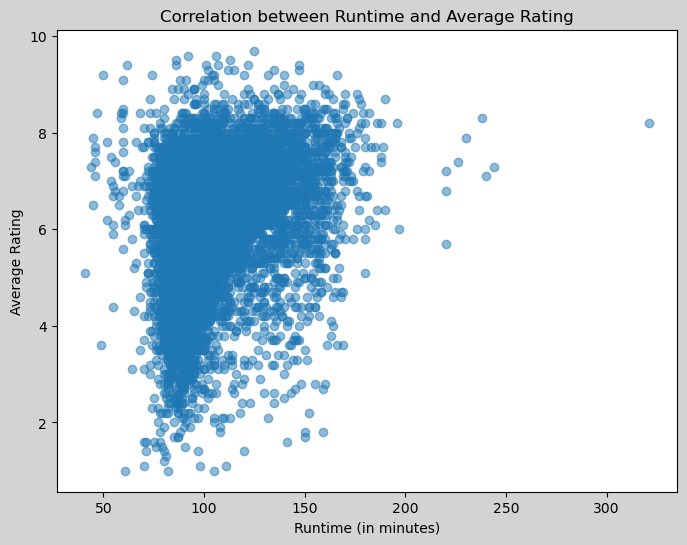

In [44]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(8,6))
ax.scatter(x=masterdata1['runtime_minutes'], y=masterdata1['averagerating'],alpha=0.5)
ax.set_xlabel('Runtime (in minutes)', fontsize = 10)
ax.set_ylabel('Average Rating', fontsize = 10)
ax.set_title('Correlation between Runtime and Average Rating', fontsize = 12)
fig.patch.set_facecolor('lightgrey')
plt.show()

Based on the correlation coefficient of 0.317 between the two variables, we can infer a weak positive relationship between them. There is a slight increase in the average rating when the runtime of a movie is increased, but the relationship is not very strong. It is important to remember that correlation does not always imply causation, and there may be other factors affecting ratings.

**Creating a dataframe called 'genres_df'**

In [45]:
genres_df = masterdata1[['genres', 'averagerating', 'start_year']].copy()
genres_df.head()

,genres,averagerating,start_year
0,Drama,6.9,2018
1,Thriller,6.6,2012
2,"Action,Crime,Drama",7.1,2016
3,"Drama,Horror",3.9,2011
4,"Drama,Mystery,Thriller",5.5,2010


**Spliting the 'genres' column which has multiple genres separated by comma into multiple rows & calculating the average rating per genre**

In [46]:
#Columns having multiple genres separated by comma splitted into individual genres and averaging it 
#and retaining the year
genres_split_year = genres_df.assign(genres=genres_df['genres'].str.split(',')).explode('genres')
genres_split_year = genres_split_year.groupby(['genres','start_year'], as_index=False)['averagerating'].mean()
genres_split_year

,genres,start_year,averagerating
0,Action,2010,5.891573
1,Action,2011,5.776506
2,Action,2012,5.641379
3,Action,2013,5.504324
4,Action,2014,5.695050
...,...,...,...
213,Western,2015,5.860000
214,Western,2016,5.933333
215,Western,2017,5.990000
216,Western,2018,5.340000


**Vertical Bar graph of the genre by Average Rating for the Period from 2010-2014 & Period from 2015-2019**

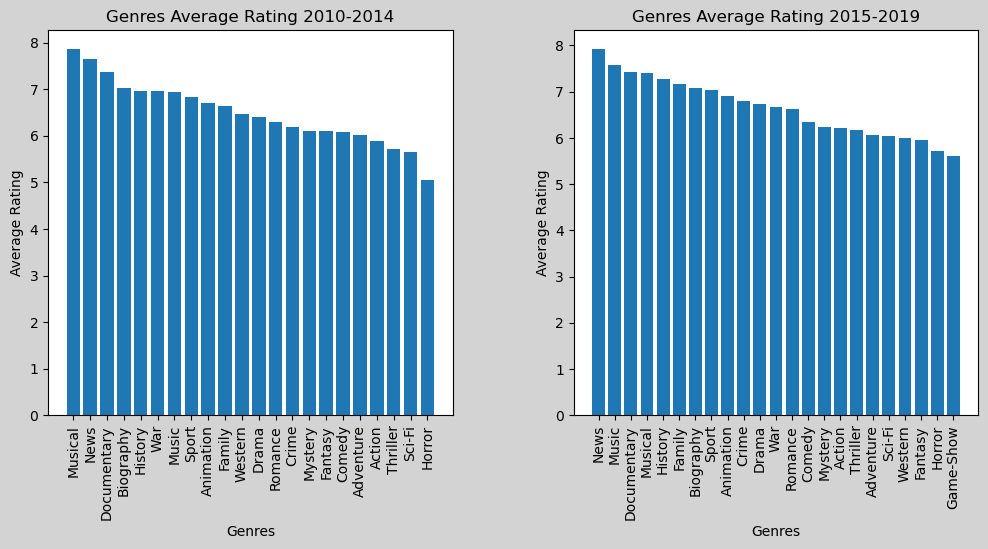

In [47]:
import matplotlib.pyplot as plt
period1 = genres_split_year[(genres_split_year['start_year'] >= 2010) & (genres_split_year['start_year'] <= 2014)].sort_values('averagerating', ascending=False)
period2 = genres_split_year[(genres_split_year['start_year'] >= 2015) & (genres_split_year['start_year'] <= 2019)].sort_values('averagerating', ascending=False)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

ax1.bar(period1['genres'], period1['averagerating'])
ax1.set_title('Genres Average Rating 2010-2014')
ax1.set_xlabel('Genres')
ax1.set_ylabel('Average Rating')
ax1.tick_params(axis='x', rotation=90)

ax2.bar(period2['genres'], period2['averagerating'])
ax2.set_title('Genres Average Rating 2015-2019')
ax2.set_xlabel('Genres')
ax2.set_ylabel('Average Rating')
ax2.tick_params(axis='x', rotation=90)

plt.subplots_adjust(wspace=0.3)
fig.patch.set_facecolor('lightgrey')

plt.show()

In [48]:
genres_df1 = masterdata1[['genres', 'averagerating']].copy()
genres_df1 = genres_df1.assign(genres=genres_df1['genres'].str.split(',')).explode('genres')
genres_df1 = genres_df1.groupby('genres')['averagerating'].mean().reset_index()
genres_df1                                  

,genres,averagerating
0,Action,5.791590
1,Adventure,5.956877
2,Animation,6.484348
3,Biography,6.919632
4,Comedy,6.003630
5,Crime,6.153394
6,Documentary,7.220942
7,Drama,6.379026
8,Family,6.387580
9,Fantasy,5.815090


**Vertical Bar graph of the genre by Average Rating for the Period from 2010 -2019**

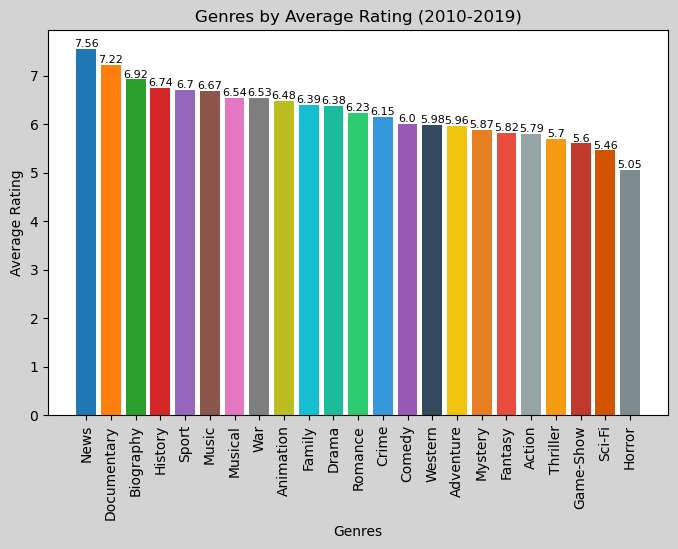

In [49]:
genres_split = genres_df1.sort_values('averagerating', ascending = False)
plt.figure(figsize=(8, 5), facecolor = 'lightgrey')
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf', '#1abc9c', '#2ecc71', '#3498db', '#9b59b6', '#34495e', '#f1c40f', '#e67e22', '#e74c3c', '#95a5a6', '#f39c12', '#c0392b', '#d35400', '#7f8c8d']
plt.bar(genres_split['genres'], genres_split['averagerating'], color=colors)
plt.title('Genres by Average Rating (2010-2019)', fontsize=12)
plt.xlabel('Genres', fontsize=10)
plt.ylabel('Average Rating',fontsize=10)
plt.xticks(rotation=90)
for index, value in enumerate(genres_split['averagerating']):
    plt.text(index, value, str(round(value, 2)), ha='center',fontsize=8, va='bottom')
plt.show()

**Creating a dataframe called 'multi_genres_df'**

**Filtering the dataframe to only include rows with more than one genre and displaying the top 20 genres based on their averagerating**

In [50]:
multi_genres_df = genres_df[genres_df['genres'].str.contains(',')]
multi_genres_df = multi_genres_df.sort_values('averagerating', ascending=False)
multi_genres_df = multi_genres_df.reset_index(drop=True)
multi_genres_top10 = multi_genres_df.head(10)
multi_genres_top10

,genres,averagerating,start_year
0,"Adventure,Biography,Documentary",9.6,2015
1,"Drama,History",9.5,2017
2,"Adventure,Family",9.4,2017
3,"Comedy,Drama,Romance",9.4,2019
4,"Action,Drama,War",9.3,2016
5,"Crime,Mystery,Thriller",9.3,2016
6,"Drama,Family",9.2,2016
7,"Comedy,Drama",9.2,2014
8,"Biography,Documentary,Drama",9.2,2014
9,"Drama,Romance",9.1,2019


 **Horizontal Bar graph of Top 10 Multi-Genres by Average Rating**

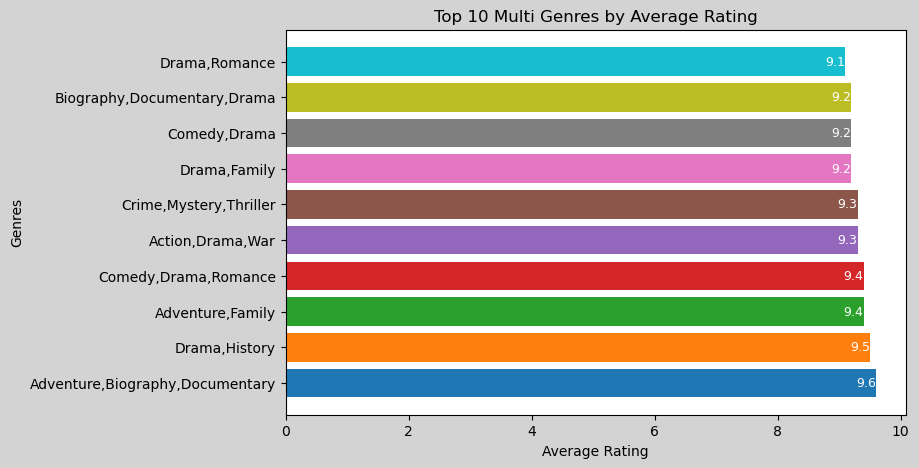

In [51]:
import matplotlib.pyplot as plt
multi_genres_top10 = multi_genres_top10.sort_values(by='averagerating', ascending=False)
fig, ax = plt.subplots(figsize=(8, 5))
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
ax.barh(multi_genres_top10['genres'], multi_genres_top10['averagerating'], color=colors)
for i, v in enumerate(multi_genres_top10['averagerating']):
    ax.text(v, i, str(v), color='white', fontsize=9, ha='right', va='center')
ax.set_title('Top 10 Multi Genres by Average Rating', fontsize=12)
ax.set_xlabel('Average Rating', fontsize=10)
ax.set_ylabel('Genres', fontsize=10)
fig.patch.set_facecolor('lightgrey')
plt.show()

## Merging df1 & df3 to form 'masterdata2'

**masterdata2**

In [52]:
masterdata2 = df3.merge(df1, left_on='title', right_on='reference_title', how='left')
masterdata2 = masterdata2[['tconst','title', 'reference_title','primary_title', 'original_title','year', 'start_year','studio', 'runtime_minutes', 'genres','domestic_gross','foreign_gross','worldwide_gross']]
masterdata2 = masterdata2.reset_index(drop=True)
masterdata2.head(10)

,tconst,title,reference_title,primary_title,original_title,year,start_year,studio,runtime_minutes,genres,domestic_gross,foreign_gross,worldwide_gross
0,tt0435761,Toy Story 3,Toy Story 3,Toy Story 3,Toy Story 3,2010,2010.0,BV,103.0,"Adventure,Animation,Comedy",415000000.0,652000000.0,1.067000e+09
1,NaN,Alice in Wonderland (2010),NaN,NaN,NaN,2010,NaN,BV,NaN,NaN,334200000.0,691300000.0,1.025500e+09
2,NaN,Harry Potter and the Deathly Hallows Part 1,NaN,NaN,NaN,2010,NaN,WB,NaN,NaN,296000000.0,664300000.0,9.603000e+08
3,tt1375666,Inception,Inception,Inception,Inception,2010,2010.0,WB,148.0,"Action,Adventure,Sci-Fi",292600000.0,535700000.0,8.283000e+08
4,tt0892791,Shrek Forever After,Shrek Forever After,Shrek Forever After,Shrek Forever After,2010,2010.0,P/DW,93.0,"Adventure,Animation,Comedy",238700000.0,513900000.0,7.526000e+08
5,tt1325004,The Twilight Saga: Eclipse,The Twilight Saga: Eclipse,The Twilight Saga: Eclipse,The Twilight Saga: Eclipse,2010,2010.0,Sum.,124.0,"Adventure,Drama,Fantasy",300500000.0,398000000.0,6.985000e+08
6,tt1228705,Iron Man 2,Iron Man 2,Iron Man 2,Iron Man 2,2010,2010.0,Par.,124.0,"Action,Adventure,Sci-Fi",312400000.0,311500000.0,6.239000e+08
7,tt0398286,Tangled,Tangled,Tangled,Tangled,2010,2010.0,BV,100.0,"Adventure,Animation,Comedy",200800000.0,391000000.0,5.918000e+08
8,tt1323594,Despicable Me,Despicable Me,Despicable Me,Despicable Me,2010,2010.0,Uni.,95.0,"Animation,Comedy,Family",251500000.0,291600000.0,5.431000e+08
9,tt0892769,How to Train Your Dragon,How to Train Your Dragon,How to Train Your Dragon,How to Train Your Dragon,2010,2010.0,P/DW,98.0,"Action,Adventure,Animation",217600000.0,277300000.0,4.949000e+08


**Dropping rows which has NaN values in column 'tconst'**

In [53]:
masterdata2.dropna(subset=['tconst'], inplace=True)

**Dropping all rows where column 'year' is not consistent to column 'start_year'**

In [54]:
x = masterdata2['year'] != masterdata2['start_year']
masterdata2.drop(masterdata2.loc[x].index, inplace=True)
masterdata2 = masterdata2.reset_index(drop=True)

**Dropping the following columns- 'title','reference_title', 'start_year'**

In [55]:
masterdata2.drop(['title', 'reference_title', 'start_year'], axis=1, inplace=True)
masterdata2.head(10)

,tconst,primary_title,original_title,year,studio,runtime_minutes,genres,domestic_gross,foreign_gross,worldwide_gross
0,tt0435761,Toy Story 3,Toy Story 3,2010,BV,103.0,"Adventure,Animation,Comedy",415000000.0,652000000.0,1.067000e+09
1,tt1375666,Inception,Inception,2010,WB,148.0,"Action,Adventure,Sci-Fi",292600000.0,535700000.0,8.283000e+08
2,tt0892791,Shrek Forever After,Shrek Forever After,2010,P/DW,93.0,"Adventure,Animation,Comedy",238700000.0,513900000.0,7.526000e+08
3,tt1325004,The Twilight Saga: Eclipse,The Twilight Saga: Eclipse,2010,Sum.,124.0,"Adventure,Drama,Fantasy",300500000.0,398000000.0,6.985000e+08
4,tt1228705,Iron Man 2,Iron Man 2,2010,Par.,124.0,"Action,Adventure,Sci-Fi",312400000.0,311500000.0,6.239000e+08
5,tt0398286,Tangled,Tangled,2010,BV,100.0,"Adventure,Animation,Comedy",200800000.0,391000000.0,5.918000e+08
6,tt1323594,Despicable Me,Despicable Me,2010,Uni.,95.0,"Animation,Comedy,Family",251500000.0,291600000.0,5.431000e+08
7,tt0892769,How to Train Your Dragon,How to Train Your Dragon,2010,P/DW,98.0,"Action,Adventure,Animation",217600000.0,277300000.0,4.949000e+08
8,tt0980970,The Chronicles of Narnia: The Voyage of the Da...,The Chronicles of Narnia: The Voyage of the Da...,2010,Fox,113.0,"Adventure,Family,Fantasy",104400000.0,311300000.0,4.157000e+08
9,tt1504320,The King's Speech,The King's Speech,2010,Wein.,118.0,"Biography,Drama,History",135500000.0,275400000.0,4.109000e+08


 **Horizontal Bar graph of Top 15 Genres by Revenue - Worldwide Gross for the Period 2010-2014 & 2015-2018**

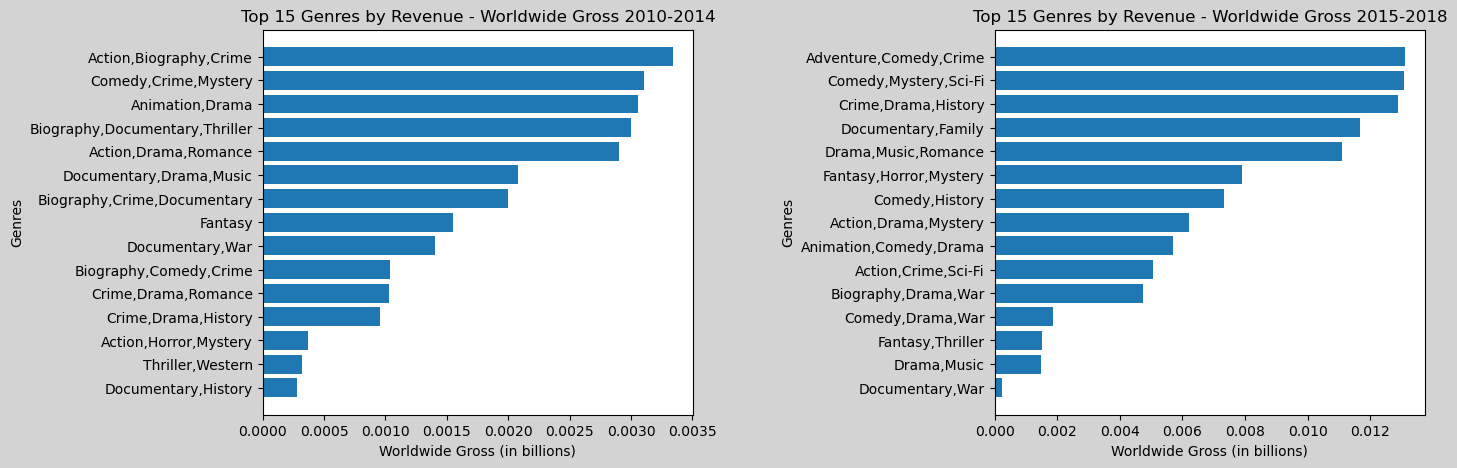

In [56]:
import matplotlib.pyplot as plt
period1 = masterdata2[(masterdata2['year'] >= 2010) & (masterdata2['year'] <= 2014)]
period2 = masterdata2[(masterdata2['year'] >= 2015) & (masterdata2['year'] <= 2018)]

period1_genres = period1.groupby('genres')['worldwide_gross'].sum().sort_values(ascending=True)[:15]
period2_genres = period2.groupby('genres')['worldwide_gross'].sum().sort_values(ascending=True)[:15]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

ax1.barh(period1_genres.index, period1_genres.values/1e9)
ax1.set_title('Top 15 Genres by Revenue - Worldwide Gross 2010-2014')
ax1.set_xlabel('Worldwide Gross (in billions)')
ax1.set_ylabel('Genres')

ax2.barh(period2_genres.index, period2_genres.values/1e9)
ax2.set_title('Top 15 Genres by Revenue - Worldwide Gross 2015-2018')
ax2.set_xlabel('Worldwide Gross (in billions)')
ax2.set_ylabel('Genres')

plt.subplots_adjust(wspace=0.7)
fig.patch.set_facecolor('lightgrey')

plt.show()

 **Horizontal Bar graph of Top 15 Genres by Revenue - Worldwide Gross**

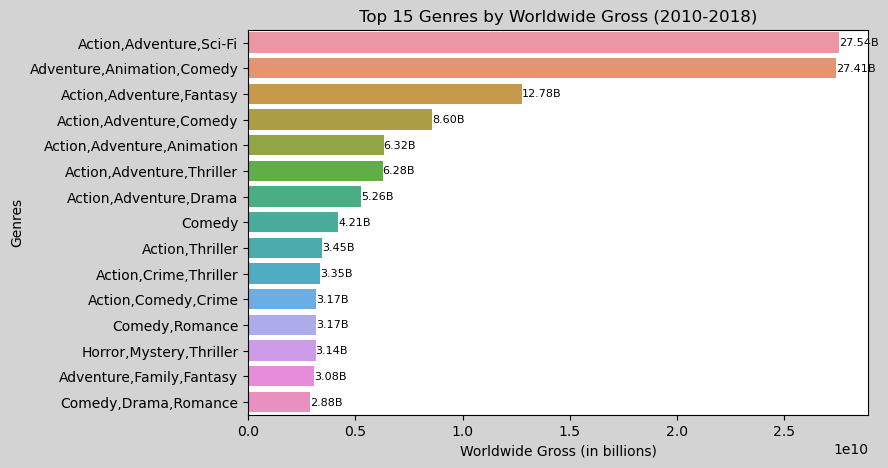

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt
top_genres = masterdata2.groupby('genres')['worldwide_gross'].sum().nlargest(15)
fig, ax = plt.subplots(figsize=(8,5))
sns.barplot(x=top_genres.values, y=top_genres.index, ax=ax)
for i, v in enumerate(top_genres.values):
    ax.text(v, i, f'{v/1e9:.2f}B', color='black', fontsize=8, ha='left', va='center')
ax.set_xlabel('Worldwide Gross (in billions)', fontsize = 10)
ax.set_ylabel('Genres', fontsize = 10)
ax.set_title('Top 15 Genres by Worldwide Gross (2010-2018)', fontsize = 12)
fig.patch.set_facecolor('lightgrey')
plt.show()

## Merging df3 & df4 to form 'masterdata3'

**masterdata3**

In [58]:
masterdata3 = pd.merge(df3, df4, how='left', left_on='title', right_on='movie')
masterdata3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2015 entries, 0 to 2014
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   title              2015 non-null   object        
 1   studio             2015 non-null   object        
 2   domestic_gross_x   2015 non-null   float64       
 3   foreign_gross_x    2015 non-null   float64       
 4   year_x             2015 non-null   int64         
 5   worldwide_gross_x  2015 non-null   float64       
 6   id                 1081 non-null   float64       
 7   release_date       1081 non-null   datetime64[ns]
 8   year_y             1081 non-null   float64       
 9   movie              1081 non-null   object        
 10  production_budget  1081 non-null   float64       
 11  domestic_gross_y   1081 non-null   float64       
 12  foreign_gross_y    1081 non-null   float64       
 13  worldwide_gross_y  1081 non-null   float64       
dtypes: datet

**Dropping rows which has NaN values in column 'movie'**

In [59]:
masterdata3.dropna(subset=['movie'], inplace=True)
masterdata3 = masterdata3.reset_index(drop=True)
masterdata3.head()

,title,studio,domestic_gross_x,foreign_gross_x,year_x,worldwide_gross_x,id,release_date,year_y,movie,production_budget,domestic_gross_y,foreign_gross_y,worldwide_gross_y
0,Toy Story 3,BV,415000000.0,652000000.0,2010,1.067000e+09,47.0,2010-06-18,2010.0,Toy Story 3,200000000.0,415004880.0,653874642.0,1.068880e+09
1,Inception,WB,292600000.0,535700000.0,2010,8.283000e+08,38.0,2010-07-16,2010.0,Inception,160000000.0,292576195.0,542948447.0,8.355246e+08
2,Shrek Forever After,P/DW,238700000.0,513900000.0,2010,7.526000e+08,27.0,2010-05-21,2010.0,Shrek Forever After,165000000.0,238736787.0,517507886.0,7.562447e+08
3,The Twilight Saga: Eclipse,Sum.,300500000.0,398000000.0,2010,6.985000e+08,53.0,2010-06-30,2010.0,The Twilight Saga: Eclipse,68000000.0,300531751.0,405571077.0,7.061028e+08
4,Iron Man 2,Par.,312400000.0,311500000.0,2010,6.239000e+08,15.0,2010-05-07,2010.0,Iron Man 2,170000000.0,312433331.0,308723058.0,6.211564e+08


**Converting column 'year_y' from float64 to int64**

**Keeping only those rows where the values in the year_x column are equal to the values in the year_y column**

In [60]:
masterdata3['year_y'] = masterdata3['year_y'].astype('int64')
masterdata3 = masterdata3[masterdata3['year_x'] == masterdata3['year_y']]
masterdata3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1062 entries, 0 to 1080
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   title              1062 non-null   object        
 1   studio             1062 non-null   object        
 2   domestic_gross_x   1062 non-null   float64       
 3   foreign_gross_x    1062 non-null   float64       
 4   year_x             1062 non-null   int64         
 5   worldwide_gross_x  1062 non-null   float64       
 6   id                 1062 non-null   float64       
 7   release_date       1062 non-null   datetime64[ns]
 8   year_y             1062 non-null   int64         
 9   movie              1062 non-null   object        
 10  production_budget  1062 non-null   float64       
 11  domestic_gross_y   1062 non-null   float64       
 12  foreign_gross_y    1062 non-null   float64       
 13  worldwide_gross_y  1062 non-null   float64       
dtypes: datet

**Dropping the following columns from the dataframe (id, release_date, year_y, movie, domestic_gross_y, foreign_gross_y, worldwide_gross_y)**

**Rearranging the columns & renaming the columns**


In [61]:
masterdata3.drop(['id', 'release_date', 'year_y','movie','domestic_gross_y', 'foreign_gross_y', 'worldwide_gross_y'], axis=1, inplace=True)
masterdata3 = masterdata3[['title','studio','year_x','production_budget','domestic_gross_x','foreign_gross_x','worldwide_gross_x']]
masterdata3 = masterdata3.rename(columns={'year_x': 'year', 'domestic_gross_x': 'domestic_gross', 'foreign_gross_x': 'foreign_gross','worldwide_gross_x': 'worldwide_gross'})
masterdata3.head()

,title,studio,year,production_budget,domestic_gross,foreign_gross,worldwide_gross
0,Toy Story 3,BV,2010,200000000.0,415000000.0,652000000.0,1.067000e+09
1,Inception,WB,2010,160000000.0,292600000.0,535700000.0,8.283000e+08
2,Shrek Forever After,P/DW,2010,165000000.0,238700000.0,513900000.0,7.526000e+08
3,The Twilight Saga: Eclipse,Sum.,2010,68000000.0,300500000.0,398000000.0,6.985000e+08
4,Iron Man 2,Par.,2010,170000000.0,312400000.0,311500000.0,6.239000e+08


**Creating a column 'profit/loss'and arranging the dataframe based on descending order of 'profit/loss'** 

In [62]:
masterdata3['profits/loss'] = (masterdata3['worldwide_gross'] - masterdata3['production_budget'])
masterdata3 = masterdata3.sort_values(by="profits/loss", ascending=False)
masterdata3 = masterdata3.reset_index(drop=True)
masterdata3.head()

,title,studio,year,production_budget,domestic_gross,foreign_gross,worldwide_gross,profits/loss
0,Black Panther,BV,2018,200000000.0,700100000.0,646900000.0,1.347000e+09,1.147000e+09
1,Jurassic World: Fallen Kingdom,Uni.,2018,170000000.0,417700000.0,891800000.0,1.309500e+09,1.139500e+09
2,Frozen,BV,2013,150000000.0,400700000.0,875700000.0,1.276400e+09,1.126400e+09
3,Minions,Uni.,2015,74000000.0,336000000.0,823400000.0,1.159400e+09,1.085400e+09
4,Avengers: Age of Ultron,BV,2015,330600000.0,459000000.0,946400000.0,1.405400e+09,1.074800e+09


**Grouping the dataset to create a dataframe "top_20_studios" by profitability**

In [63]:
studio_profits = masterdata3.groupby('studio')['profits/loss'].sum()
studio_profits = studio_profits.sort_values(ascending=False)
top_20_studios = studio_profits.head(20)
top_20_studios_df = top_20_studios.to_frame().reset_index()
top_20_studios_df 

,studio,profits/loss
0,BV,2.258614e+10
1,Fox,1.892353e+10
2,Uni.,1.751031e+10
3,WB,1.412790e+10
4,Sony,1.236484e+10
5,Par.,9.675967e+09
6,WB (NL),6.449900e+09
7,LGF,4.880481e+09
8,P/DW,3.742500e+09
9,LG/S,2.257794e+09


**Horizontal Bar graph of Top 20 Profitable Studios**

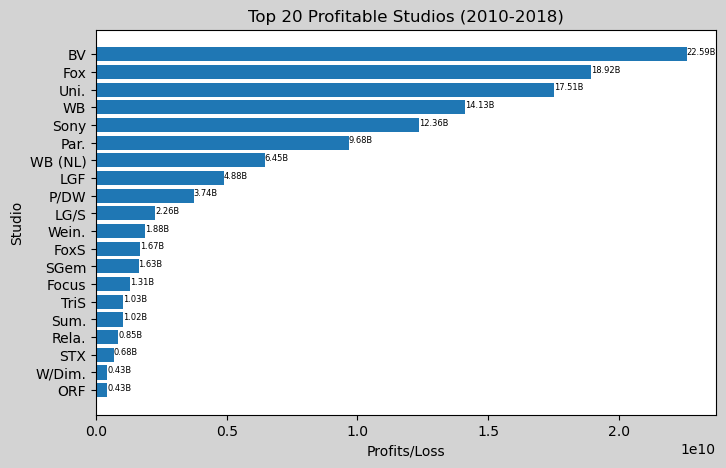

In [64]:
import matplotlib.pyplot as plt
top_20_studios_df = top_20_studios_df.sort_values('profits/loss', ascending = True)
plt.figure(figsize=(8, 5), facecolor = 'lightgrey')
plt.barh(top_20_studios_df['studio'], top_20_studios_df['profits/loss'])
for index, value in enumerate(top_20_studios_df['profits/loss']):
    plt.text(value, index, str(round(value/1e9, 2))+'B', fontsize=6)
plt.xlabel('Profits/Loss', fontsize = 10)
plt.ylabel('Studio', fontsize = 10)
plt.title('Top 20 Profitable Studios (2010-2018)', fontsize = 12)
plt.show()

**Grouping the dataset to create a dataframe top 20 "loss_studios"**

In [65]:
studio_loss = masterdata3.groupby('studio')['profits/loss'].sum().reset_index()
sorted_studio_loss = studio_loss.sort_values('profits/loss')
loss_studios = sorted_studio_loss.head(20)
loss_studios = loss_studios.reset_index(drop=True)
loss_studios

,studio,profits/loss
0,Magn.,-81267400.0
1,Free,-78396000.0
2,MNE,-64225600.0
3,NM,-30981000.0
4,VE,-27809000.0
5,OMNI/FSR,-15400000.0
6,Amazon,-12100000.0
7,ATO,-11459300.0
8,PH,-10000000.0
9,Anch.,-9681900.0


**Horizontal Bar graph of Top 20 Loss Making Studios**

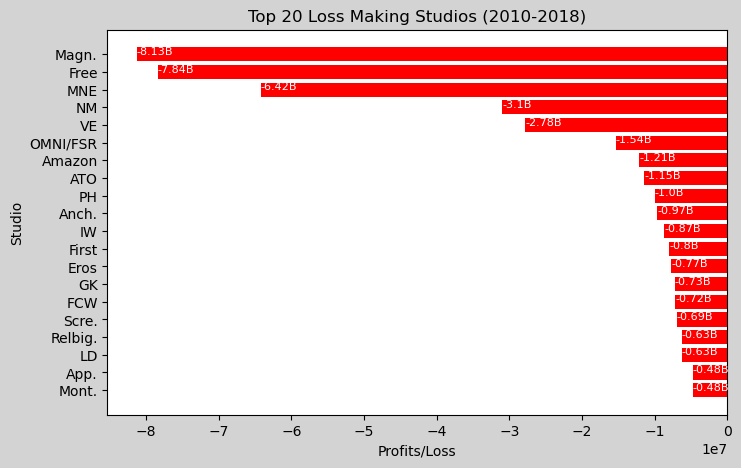

In [66]:
import matplotlib.pyplot as plt
loss_studios = loss_studios.sort_values('profits/loss', ascending = False)
plt.figure(figsize=(8, 5), facecolor = 'lightgrey')
plt.barh(loss_studios['studio'], loss_studios['profits/loss'], color = 'red')
for index, value in enumerate(loss_studios['profits/loss']):
    plt.text(value, index, str(round(value/1e7, 2))+'B', fontsize=8, color = 'white')
plt.xlabel('Profits/Loss', fontsize = 10)
plt.ylabel('Studio', fontsize = 10)
plt.title('Top 20 Loss Making Studios (2010-2018)', fontsize = 12)
plt.show()